## Lista Computacional 04 - Inteligência Artificial
### Douglas Gaspar Feitosa Freitas

#### Como, ao contrário do que diz o pdf, os dados artificiais não foram disponibilizados em anexo, eu criei os meus próprios!

#### 0. Crie os dados que estão faltando.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Função para gerar dados artificiais
def generate_data():
    # Geração de 3 clusters circulares
    cluster_1 = np.random.randn(100, 2) + np.array([5, 5])
    cluster_2 = np.random.randn(100, 2) + np.array([0, 0])
    cluster_3 = np.random.randn(100, 2) + np.array([5, 0])
    
    # Dados em formato de lua
    from sklearn.datasets import make_moons
    moons, _ = make_moons(n_samples=200, noise=0.05)
    
    # Dados com ruído
    from sklearn.datasets import make_blobs
    blobs, _ = make_blobs(n_samples=200, centers=3, cluster_std=1.0, random_state=42)
    noise = np.random.uniform(low=-10, high=10, size=(20, 2))  # Outliers
    
    return (cluster_1, cluster_2, cluster_3), moons, np.vstack([blobs, noise])

# Função para plotar os dados
def plot_data(data, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], s=50)
    plt.title(title)
    plt.show()

# Gera os dados
circular_data, moon_data, noisy_data = generate_data()
print("Done!")

Done!


#### 1. Implemente os algoritmos K-Means, Hierarchical Clustering e DBSCAN.

In [6]:
# K-Means
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

# Hierarchical Clustering
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def cluster_distance(cluster1, cluster2, X):
    max_distance = -1
    for point1 in cluster1:
        for point2 in cluster2:
            dist = euclidean_distance(X[point1], X[point2])
            if dist > max_distance:
                max_distance = dist
    return max_distance

# Hierarchical Clustering
def hierarchical_clustering(X, num_clusters):
    clusters = [[i] for i in range(len(X))]
    
    while len(clusters) > num_clusters:
        min_distance = float('inf')
        to_merge = (None, None)
        
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = cluster_distance(clusters[i], clusters[j], X)
                if dist < min_distance:
                    min_distance = dist
                    to_merge = (i, j)
        
        clusters[to_merge[0]] += clusters[to_merge[1]]
        del clusters[to_merge[1]]
    
    labels = np.zeros(len(X))
    for cluster_idx, cluster in enumerate(clusters):
        for idx in cluster:
            labels[idx] = cluster_idx
    return labels

# DBScan
def dbscan(X, eps, min_samples):
    labels = np.full(X.shape[0], -1)
    cluster_id = 0
    for i in range(len(X)):
        if labels[i] != -1:
            continue
        neighbors = np.where(np.linalg.norm(X - X[i], axis=1) < eps)[0]
        if len(neighbors) < min_samples:
            continue
        labels[i] = cluster_id
        for neighbor in neighbors:
            if labels[neighbor] == -1:
                labels[neighbor] = cluster_id
        cluster_id += 1
    return labels

#### 2. Plote cada conjunto de dados. Estime, apenas por inspeção visual, a quantidade de clusters ideal para cada conjunto.

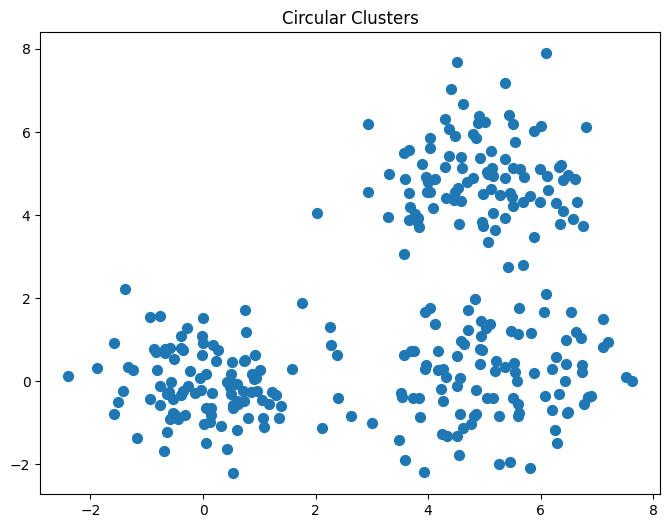

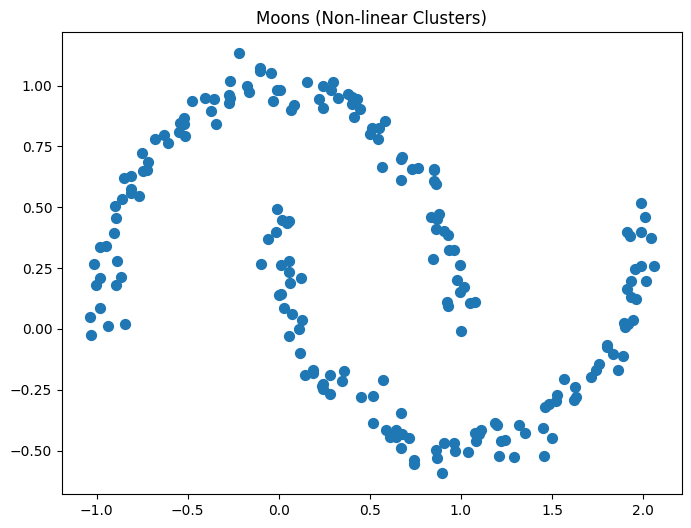

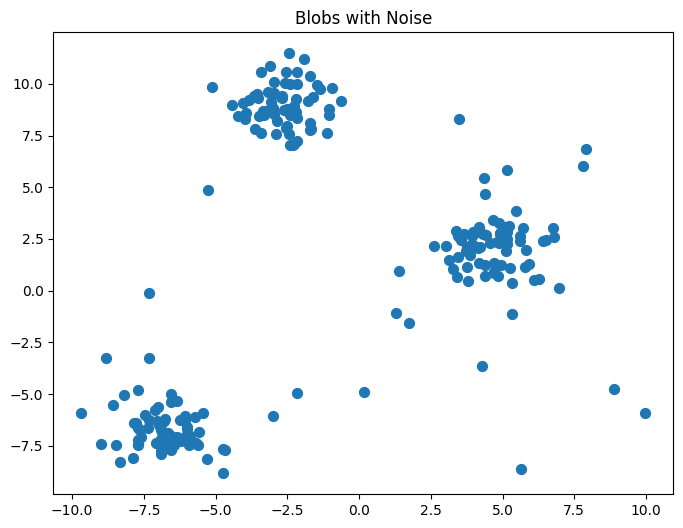

In [5]:
# Plotando os dados
plot_data(np.vstack(circular_data), "Circular Clusters")
plot_data(moon_data, "Moons (Non-linear Clusters)")
plot_data(noisy_data, "Blobs with Noise")

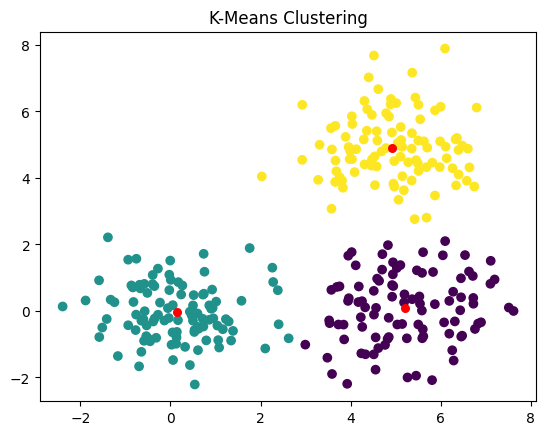

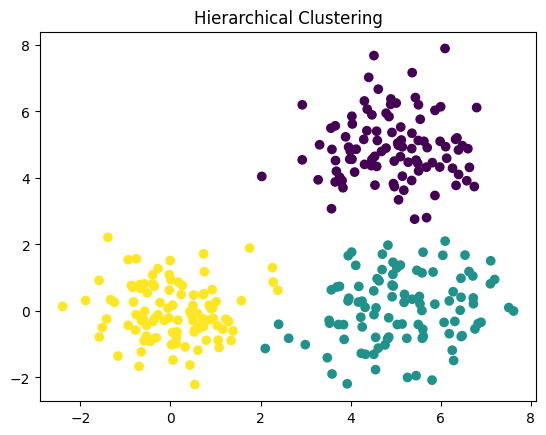

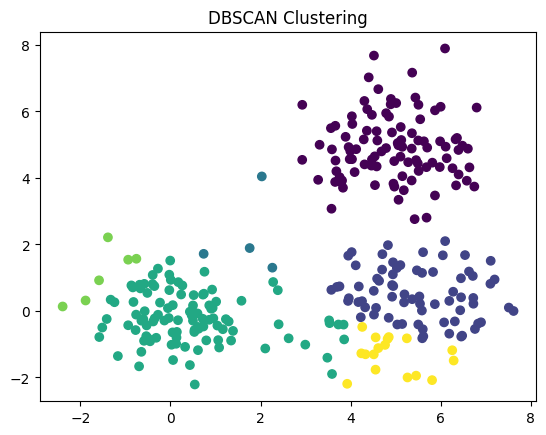

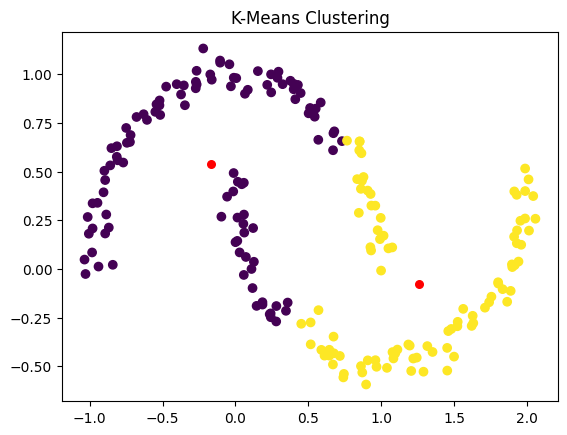

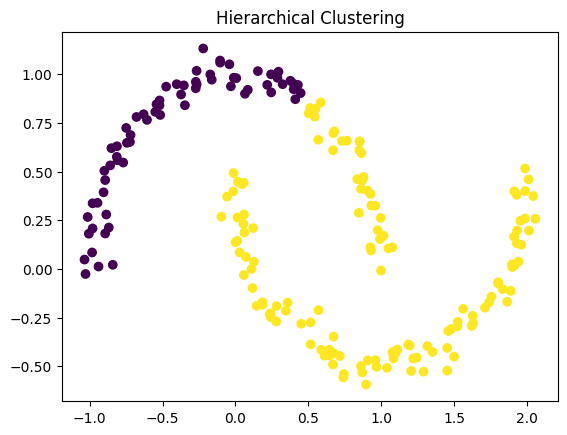

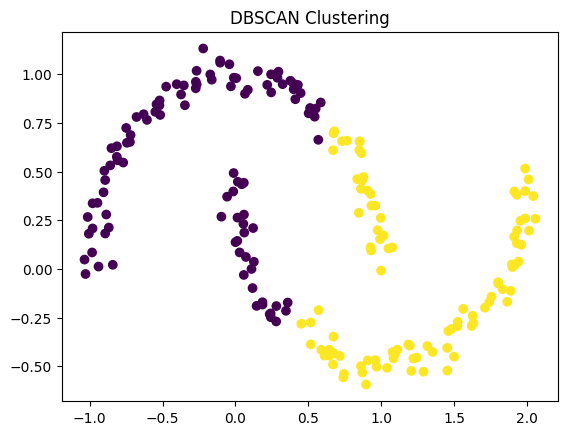

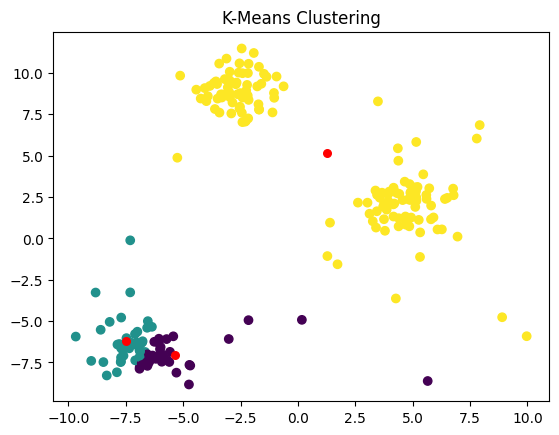

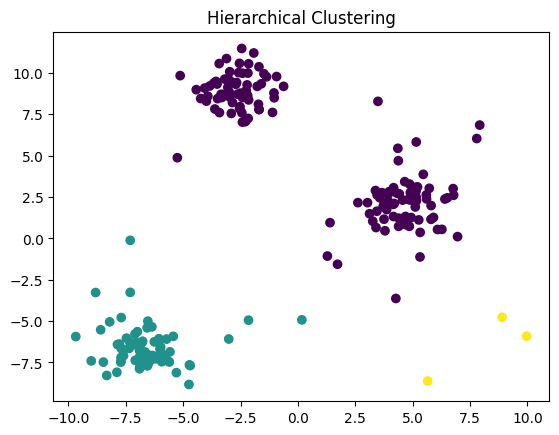

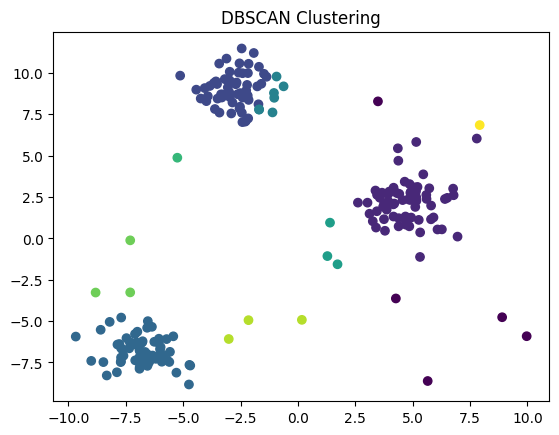

In [18]:
data1 = np.vstack(circular_data)
data2 = np.vstack(moon_data)
data3 = np.vstack(noisy_data)

# Circular Data
# Aplicando o K-Means
labels, centroids = kmeans(data1, k=3)
plt.scatter(data1[:, 0], data1[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=30, c='red')
plt.title('K-Means Clustering')
plt.show()

# Aplicando o Hierarchical Clustering
labels = hierarchical_clustering(data1, 3)
plt.scatter(data1[:, 0], data1[:, 1], c=labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.show()

# Aplicando o DBSCAN
labels = dbscan(data1, eps=3, min_samples=10)
plt.scatter(data1[:, 0], data1[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

# Moon Data
# Aplicando o K-Means
labels, centroids = kmeans(data2, k=2)
plt.scatter(data2[:, 0], data2[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=30, c='red')
plt.title('K-Means Clustering')
plt.show()

# Aplicando o Hierarchical Clustering
labels = hierarchical_clustering(data2, 2)
plt.scatter(data2[:, 0], data2[:, 1], c=labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.show()

# Aplicando o DBSCAN
labels = dbscan(data2, eps=1.5, min_samples=5)
plt.scatter(data2[:, 0], data2[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

# Noisy Data
# Aplicando o K-Means
labels, centroids = kmeans(data3, k=3)
plt.scatter(data3[:, 0], data3[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=30, c='red')
plt.title('K-Means Clustering')
plt.show()

# Aplicando o Hierarchical Clustering
labels = hierarchical_clustering(data3, 3)
plt.scatter(data3[:, 0], data3[:, 1], c=labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.show()

# Aplicando o DBSCAN
labels = dbscan(data3, eps=4, min_samples=5)
plt.scatter(data3[:, 0], data3[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

##### Por inspeção visual, você diria que os algoritmos obtiveram um resultado próximo do ideal?

Depende dos dados e do algoritmo. O K-Means e Hierarchical obtiveram resultados bons no primeiro dataset. O K-Means obteve resultado bom no terceiro dataset, enquanto o Hierarchical Clustering não. O DBSCAN obteve resultados ruins em todos os datasets, não importa o quanto eu tenha ajustado os parâmetros. Todos obtiveram resultados ruins no segundo dataset.